In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<img src = 'https://www.visitmorocco.com/sites/default/files/thumbnails/image/maigrir-vite-sans-r%C3%A9gime-sans-sport-niaque-gain-vitesse-reussir-success.jpg'
width = "700">

# Fitness Analysis

# Group 11

Presented by:
1) Shirel Hermon 
2) Elad Maisy 
3) Tamir Colton
4) Shiran Cohen

Link to dataset: https://www.kaggle.com/datasets/nithilaa/fitness-analysis

# Introduction
 Fitness is one of the most important factors to a healthy lifestyles. 
 The data presented is based on survey that contains data such as what exercies people do, what motivates them, how many times a week they workout ,etc. We looked at different aspects of the data according to age, weather they workout in a group setting, what prevents them from working out and keeping a healthy lifestyle.
 
 
 Table of Content:
 1) Introduction 
 2) Wrangling the data
 3) Presenting the data
     - Women and men by age 
     - Types of Exercies 
     - Importance of Exercise 
     - Reasons preventing exercies 
     - Reasons preventing a health diet
4) Relation between age and type of exercise 
5) Daily activity time in relation to their age.
6) Motivation in realations to age
7) Working out with others 
8) Overall conclusion

## Wrangling the data:

In [12]:
url = 'https://raw.githubusercontent.com/amitaslanov/fitness-app/main/fitness%20analysis.csv'
data = pd.read_csv(url)

In [13]:
data.dtypes

Timestamp                                                                                                                object
Your name                                                                                                                object
Your gender                                                                                                              object
Your age                                                                                                                 object
How important is exercise to you ?                                                                                        int64
How do you describe your current level of fitness ?                                                                      object
How often do you exercise?                                                                                               object
What barriers, if any, prevent you from exercising more regularly?           (Please select all that app

Checking if theres missing values:

In [14]:
data.isnull().sum().sort_values(ascending=True)

Timestamp                                                                                                                0
Have you ever recommended your friends to follow a fitness routine?                                                      0
How healthy do you consider yourself?                                                                                    0
What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)    0
Would you say you eat a healthy balanced diet ?                                                                          0
How long do you spend exercising per day ?                                                                               0
What time if the day do you prefer to exercise?                                                                          0
Do you exercise ___________ ?                                                                                            0
What form(s) of 

Seems that theres no missing values.

Removing columns and renaming columns.

In [15]:
del data['Timestamp']
del data['Your name ']

In [16]:
data = data.rename(columns = {'Your gender ':'Gender'})
data = data.rename(columns = {'Your age ':'Age'})
data = data.rename(columns = {'How important is exercise to you ?':'exercise_importance'})
data = data.rename(columns = {'How do you describe your current level of fitness ?':'fitness_level'})
data = data.rename(columns = {'How often do you exercise?':'frequency'})
data = data.rename(columns={'What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)':'barriers_exercies'},)
data = data.rename(columns={ 'What form(s) of exercise do you currently participate in ?                        (Please select all that apply)':'Type of Exercise'})
data = data.rename(columns={'Do you exercise ___________ ?' :'Workout Enviorement'})
data = data.rename(columns={'What time if the day do you prefer to exercise?':'Time of exercise'})
data = data.rename(columns={'How long do you spend exercising per day ?':'hours_per_day'})
data = data.rename(columns={'Would you say you eat a healthy balanced diet ?':'balanced_diet'})
data = data.rename(columns={'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)':'diet_barriers'})
data = data.rename(columns={'Would you say you eat a healthy balanced diet ?':'balanced_diet'})
data = data.rename(columns={'How healthy do you consider yourself?' :'health_level'})
data = data.rename(columns={'Would you say you eat a healthy balanced diet ?':'balanced_diet'})
data = data.rename(columns={'Have you ever recommended your friends to follow a fitness routine?':'friend_reccomend'})
data = data.rename(columns={'What motivates you to exercise?         (Please select all that applies )':'motivation'})


In [17]:
data= data.replace({"frequency" : { "Never" : "0", '1 to 2 times a week' : "1-2" , "2 to 3 times a week": "2-3", "3 to 4 times a week":"3-4", "5 to 6 times a week":"5-6", "Everyday":"7"}})


In [18]:
data = data.replace('19 to 25','19-25')
data = data.replace('15 to 18','15-18')
data = data.replace('26 to 30','26-30')
data = data.replace('30 to 40','30-40')
data = data.replace('40 and above','40+')

## Presenting the data

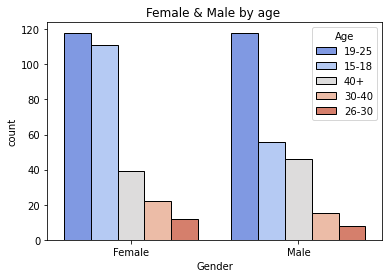

Gender
Female    302
Male      243
dtype: int64

In [19]:
order=["Female","Male"]
sns.countplot(x="Gender", hue="Age" , data=data, edgecolor = 'black' ,palette="coolwarm" ,order = order).set(title='Female & Male by age ')
plt.show()
data[['Gender']].value_counts()

The graph above shows the number of women-302, and the number of men-243, who answered the survey in our data. The age range ranges from 15 to 40+.

In [20]:
list_exs = data["Type of Exercise"].str.split(";", n = 3, expand = True)

### Types of Exercise 

In [21]:
data["1 class"]= list_exs[0]
data["2 classes"]= list_exs[1]
data["3 classes"]= list_exs[2]
data["4 classes"]= list_exs[3]

In [22]:
newdata = pd.melt(data, id_vars=['fitness_level'], value_vars=["1 class","2 classes", "3 classes", "4 classes"])
newdata = newdata.rename(columns={'variable':'classes','value':'Type of Exercise'})

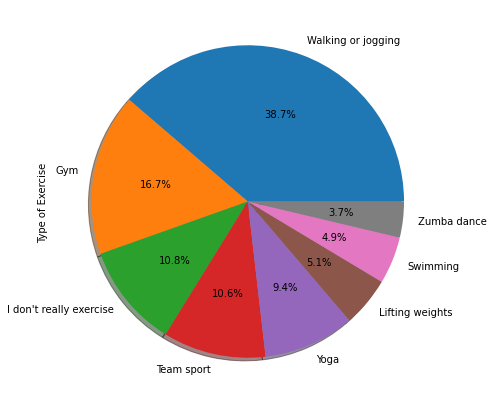

In [23]:
plt.figure(figsize=(7,10))
newdata['Type of Exercise'].value_counts().head(8).plot.pie(autopct='%1.1f%%', shadow = True);

We can see that the most common sport is walking/gym. The other types of sports mentioned here: Zumba, yoga, swimming, group sports or people who stated that they do not exercise at all.

### Exercise importance 
The following graph accurately shows our ambitions against reality. The people in the study were required to rate from 1-5 how important physical activity is to them and in addition rate how often they exercise.

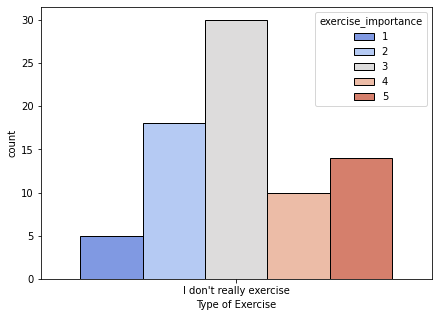

In [24]:
order=["I don't really exercise"]
plt.figure(figsize=(7,5))
sns.countplot(x="Type of Exercise", hue="exercise_importance" , data=data, edgecolor = 'black',palette='coolwarm' ,order = order)
plt.show()

In the above graph you can see that there are a lot of people who rated 5 (meaning physical activity is important to them) but in practice they don't exercise at all! 

### Reasons preventing Exercise

Text(0.5, 1.0, 'Reasons preventing Exercise')

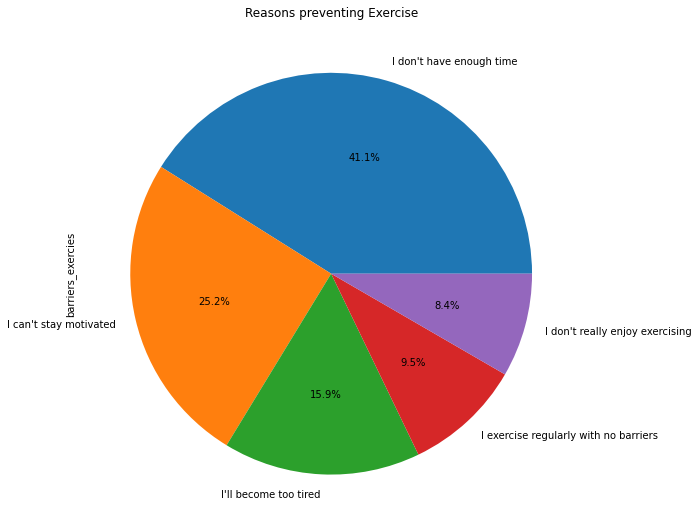

In [25]:
ex_barriers = data['barriers_exercies'].str.split(";", n=3, expand = True)
data["1"]= ex_barriers[0]
data["2"]= ex_barriers[1]
data["3"]= ex_barriers[2]
data["4"]= ex_barriers[3]
newdata = pd.melt(data, id_vars=['fitness_level'], value_vars=["1","2", "3", "4"])
newdata = newdata.rename(columns={'variable':'classes','value':'barriers_exercies'})
plt.figure(figsize=(9,10))
newdata['barriers_exercies'].value_counts().head().plot.pie(autopct='%1.1f%%')
plt.title("Reasons preventing Exercise")


What prevents people from exercising regularly:
1) Don't have enough time 
2) Can't stay motivated 
3) Becoming too tired 
4) Don't enjoy exercising 

9.5% of people who answered the survery dont have any barriers holding them back.

### Reasons preventing healthy diet 

Text(0.5, 1.0, 'Top barriers to maintaining a healthy diet exercise')

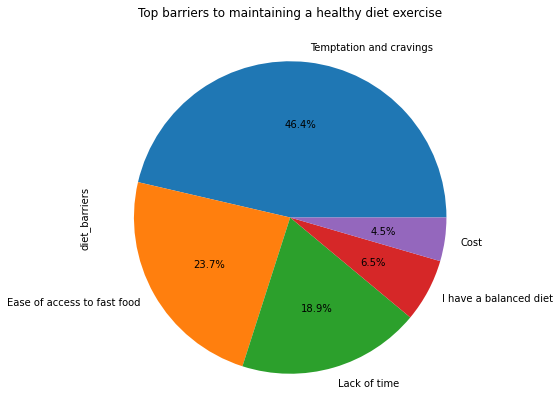

In [26]:
diet_barriers= data['diet_barriers'].str.split(";", n=3, expand = True)
data["1"]= diet_barriers[0]
data["2"]= diet_barriers[1]
data["3"]= diet_barriers[2]
data["4"]= diet_barriers[3]
newdata = pd.melt(data, id_vars=['fitness_level'], value_vars=["1","2", "3", "4"])
newdata = newdata.rename(columns={'variable':'classes','value':'diet_barriers'})
plt.figure(figsize=(7,10))
newdata['diet_barriers'].value_counts().head().plot.pie(autopct='%1.1f%%')
plt.title("Top barriers to maintaining a healthy diet exercise")

Top barriers to maintaining a healthy diet exercise:
1) Temptation and craving 
2) Ease of access to fast 
3) Lack of time 
4) Cost

6.5% of people who answered the survery dont have any barriers holding them back.

## 1 - Relation between age and type of exercise 


In [27]:
data['exercise_importance'] = data['exercise_importance'].astype('category').cat.codes
data['health_level'] = data['health_level'].astype('category').cat.codes
data['fitness_level'] = data['fitness_level'].astype('category').cat.codes

In [28]:
list_exs = data["Type of Exercise"].str.split(";", n = 6, expand = True)

In [29]:
data["1 class"]= list_exs[0]
data["2 classes"]= list_exs[1]
data["3 classes"]= list_exs[2]
data["4 classes"]= list_exs[3]

In [30]:
data["id"] = data.index + 1


In [31]:
newdata = pd.melt(data, id_vars=['fitness_level',"Age"], value_vars=["1 class","2 classes", "3 classes", "4 classes"])


In [32]:
newdata = newdata.rename(columns={'variable':'classes','value':'Type of Exercise'})

In [33]:
newdata = newdata.rename(columns = {'Type of Exercise':'Type_of_Exercise'})

In [34]:
newdata[["classes"]].value_counts()

classes  
1 class      545
2 classes    545
3 classes    545
4 classes    545
dtype: int64

In [35]:
data[["Age"]].value_counts()

Age  
19-25    236
15-18    167
40+       85
30-40     37
26-30     20
dtype: int64

In [36]:
newdata = newdata.dropna()

In [37]:
newdata.isnull().sum()

fitness_level       0
Age                 0
classes             0
Type_of_Exercise    0
dtype: int64

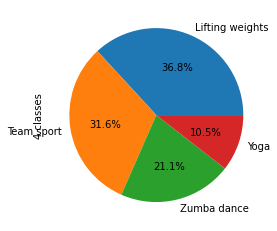

In [38]:
data['4 classes'].value_counts().plot.pie(autopct='%1.1f%%');

In [39]:
data[["Age"]].value_counts()

Age  
19-25    236
15-18    167
40+       85
30-40     37
26-30     20
dtype: int64

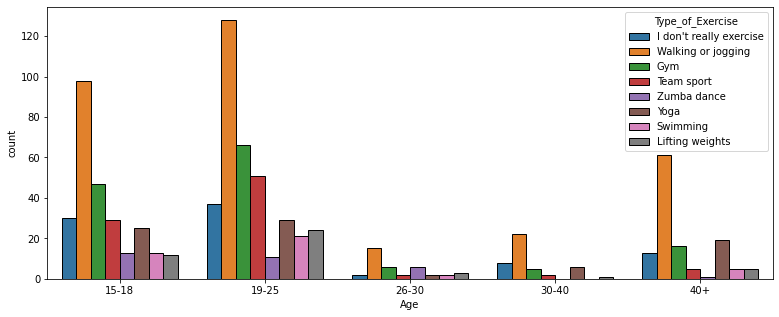

In [40]:
order=["15-18","19-25","26-30","30-40","40+"]
plt.figure(figsize=(13,5))
sns.countplot(x='Age', hue="Type_of_Exercise" , data=newdata, edgecolor = 'black', order = order)
plt.show()

In [41]:
newdata = newdata.replace({'Type_of_Exercise': { "I don't really exercise" : "don't exercise ", 'Walking or jogging' : 'jogging', }})

#### Exercise dictionary:

- 1 - I don't really exersice
- 2 - Walking or jogging
- 3 - Gym
- 4 - Team sport
- 5 - Zumba dance
- 6 - Yoga
- 7 - Swimming
- 8 - Lifting weights

Text(0.5, 1.0, '40+')

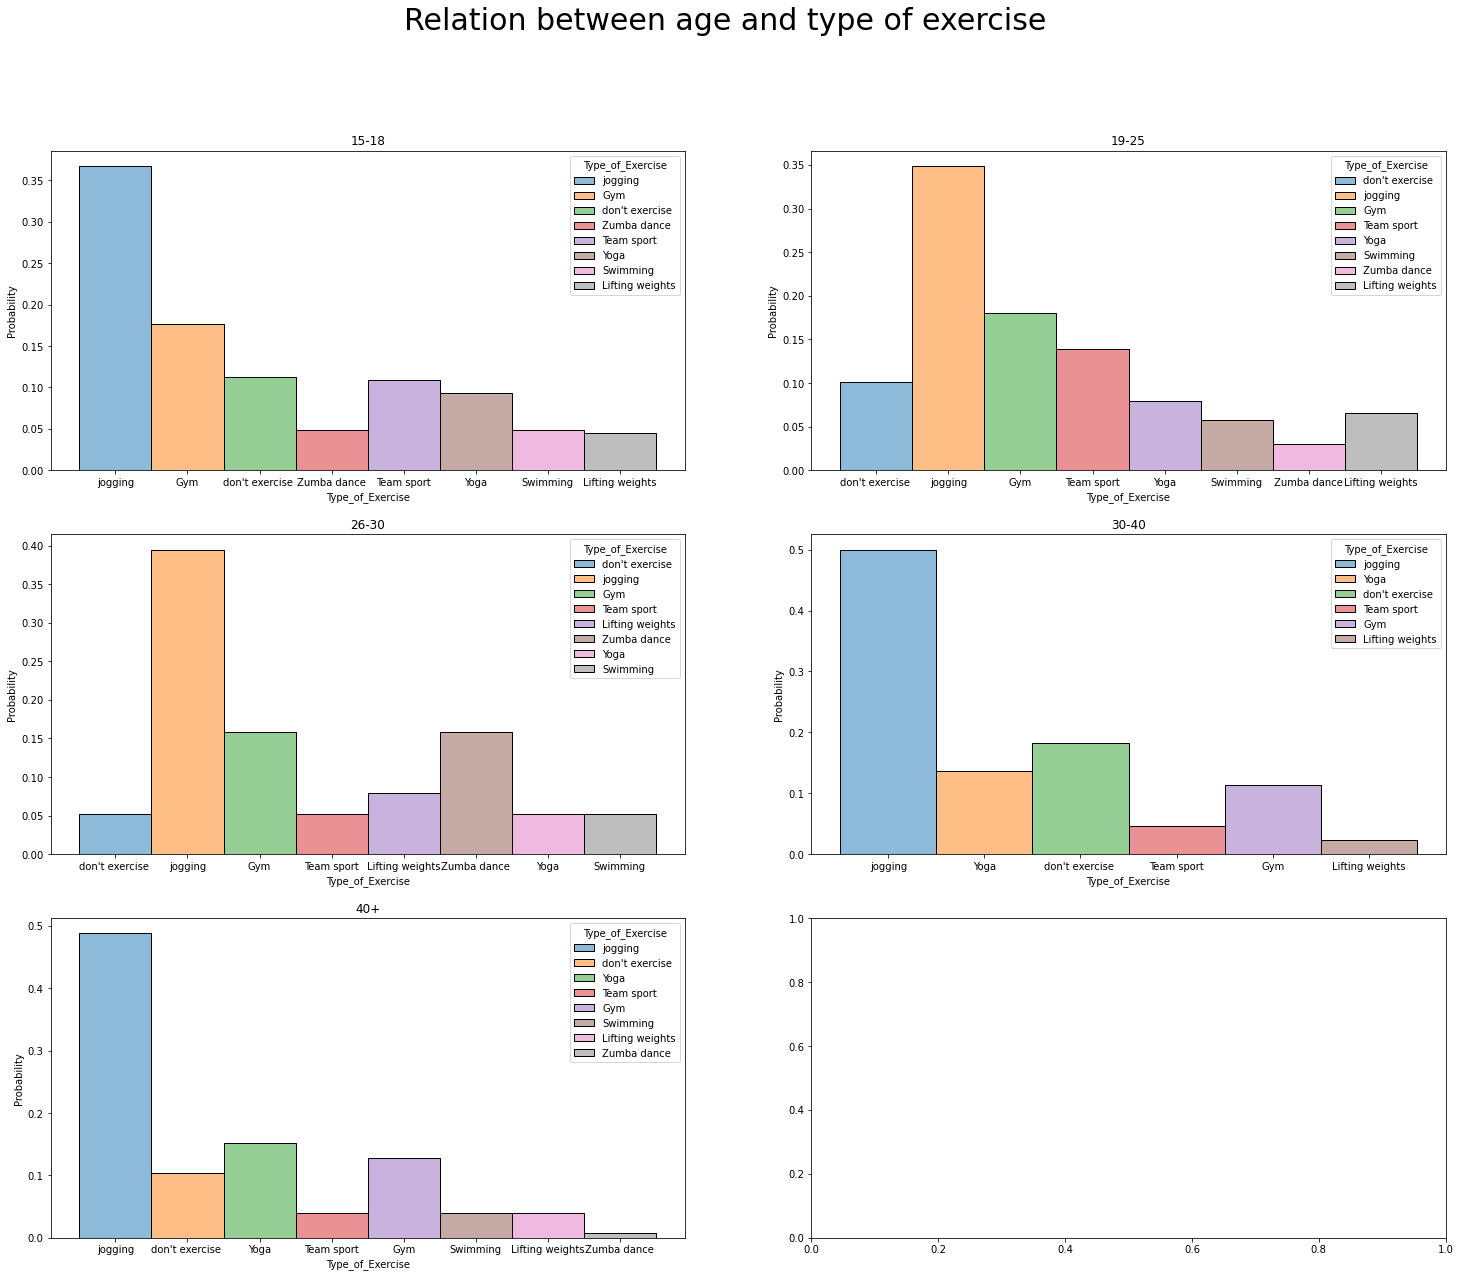

In [55]:
order=["don't exercise" , 'jogging', 'Gym' , 'Team sport', 'Zumba dance', 'Yoga' ,'Swimming', 'Lifting weights']
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
fig.suptitle('Relation between age and type of exercise',size=30)
fig1=sns.histplot(ax = axes[0,0],data = newdata[newdata.Age == '15-18'], x = 'Type_of_Exercise',stat="probability",hue='Type_of_Exercise')
fig2=sns.histplot(ax = axes[0,1],data = newdata[newdata.Age == '19-25'], x = 'Type_of_Exercise',stat="probability",hue='Type_of_Exercise')
fig3=sns.histplot(ax = axes[1,0],data = newdata[newdata.Age == '26-30'], x = 'Type_of_Exercise',stat="probability",hue='Type_of_Exercise')
fig4=sns.histplot(ax = axes[1,1],data = newdata[newdata.Age == '30-40'], x = 'Type_of_Exercise',stat="probability",hue='Type_of_Exercise')
fig5=sns.histplot(ax = axes[2,0],data = newdata[newdata.Age == '40+'], x = 'Type_of_Exercise',stat="probability",hue='Type_of_Exercise')
fig1.set_title("15-18")
fig2.set_title("19-25")
fig3.set_title("26-30")
fig4.set_title("30-40")
fig5.set_title("40+")

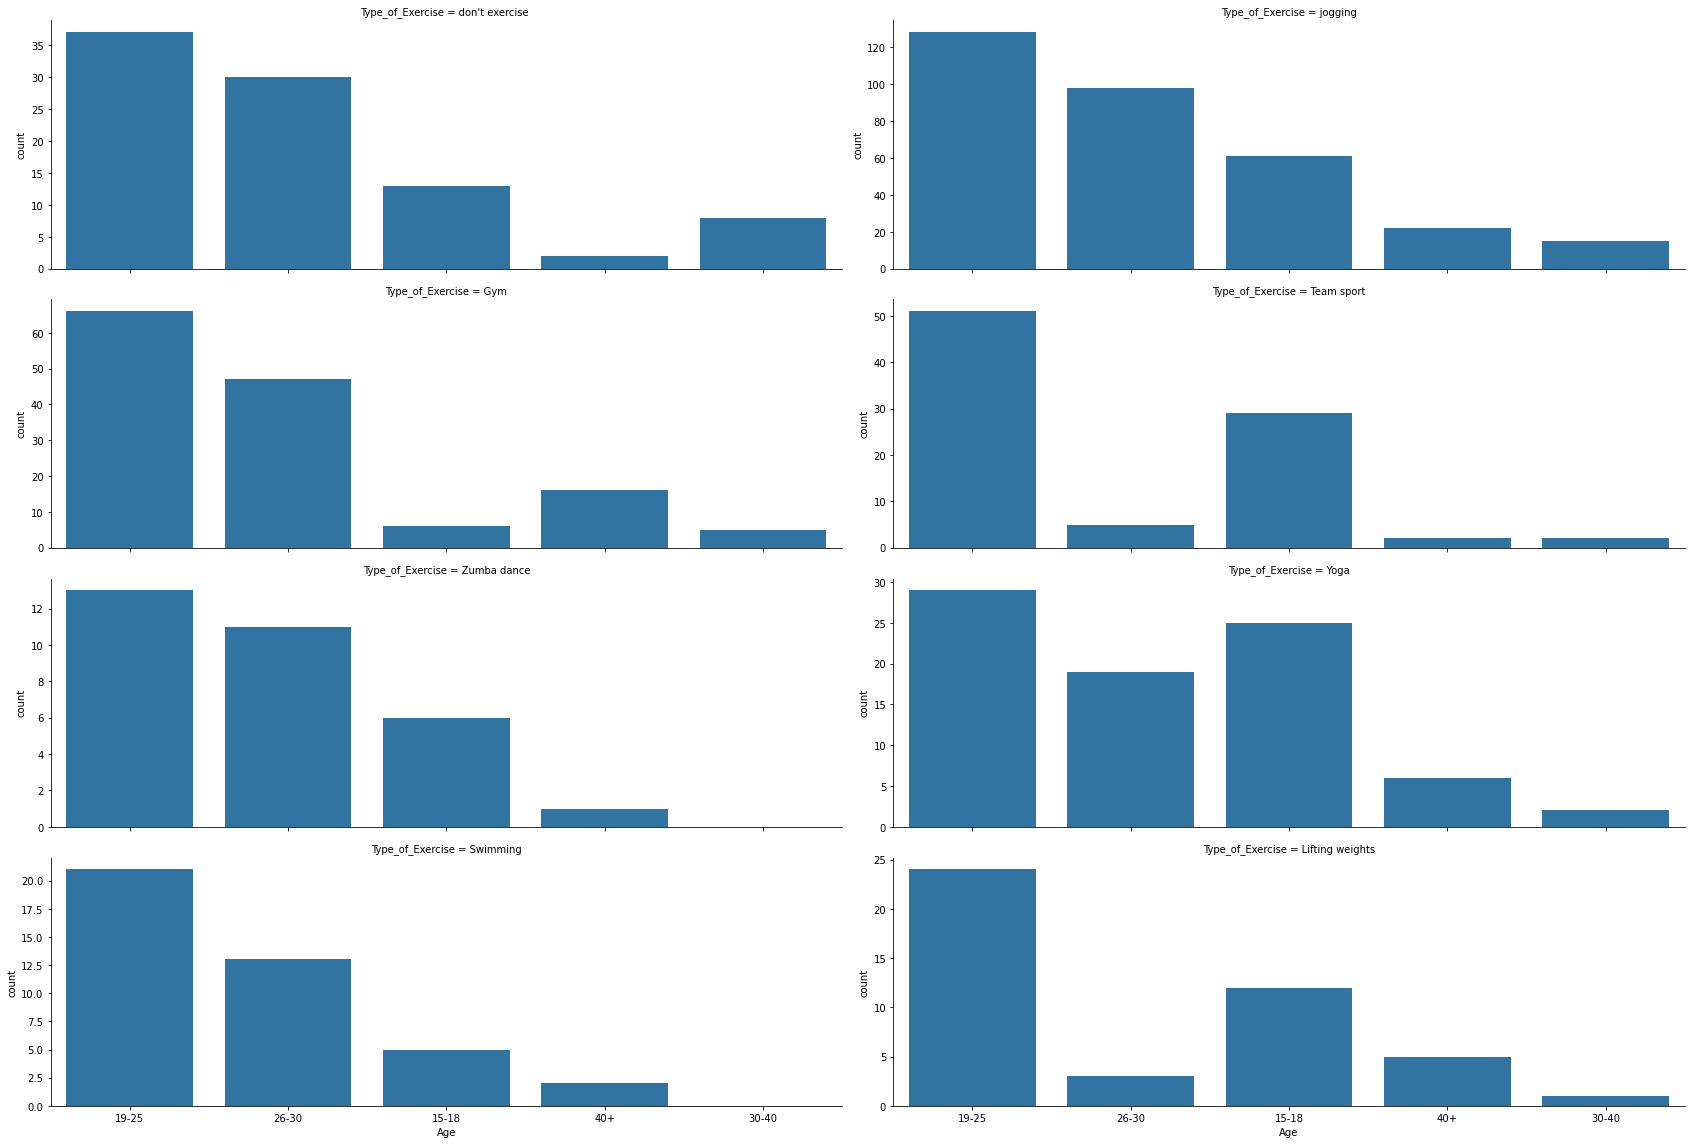

In [43]:
features1=["15-18","19-25","26-30","30-40","40+"]
grid_histplots = sns.FacetGrid(newdata, col="Type_of_Exercise", col_wrap= 2,height=4, aspect=2.95,sharey= False)
grid_histplots.map_dataframe(sns.countplot, x = 'Age')                 



## Conclusion - 1
1. Walking is the leading sport, followed by the gym and then team sports.
1. The age at which the largest relative percentage who do not do sports is between 30-40
2. Of course, as you get older, you do more walks
3. An interesting statistic is that Zumba is very strong between 26-30.

## 2 - Daily activity time in relation to their age.
Some people are early birds and some prefer exercising in the morning.
The following graph shows the ages of the participants in relation to the time of day they exercise.

In [44]:
result = pd.get_dummies(data['Time of exercise'])

In [45]:
data = pd.concat([data,result],axis=1)

In [46]:
time= data.groupby('Age')[['Early morning','Afternoon','Evening']].sum()


[Text(0.5, 1.0, 'Distribution of time of exercise by time of day')]

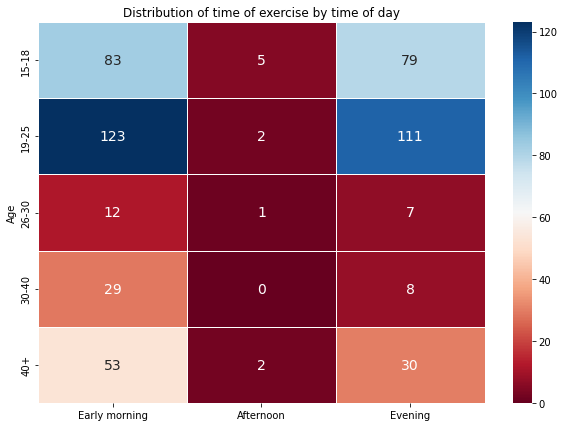

In [47]:
figure = plt.figure(figsize=(10,7))
sns.heatmap(time, cmap='RdBu',annot=True, fmt= 'g', linewidth=1, annot_kws={
    'fontsize': 14}).set(title="Distribution of time of exercise by time of day")

## Conclusion - 2
According to the graph you can see that the requested training times of the day are: early in the morning/evening.
After all, most people didn't practice.

## 3 - Motivation in realations to age

![downlowd.gift](https://c.tenor.com/jEksHlQKvQoAAAAC/work-out-running.gif)

In [48]:
list1_exs = data['motivation'].str.split(";", n = 6, expand = True)

In [49]:
data = data.replace({"Age": {  '15-18': 1,  '19-25': 2, '26-30' : 3,'30-40' : 4,'40+' : 5}})

#### Age dictionary:

- 1 -15-18
- 2 - 19-25
- 3 - 26-30
- 4 - 30-40
- 5 - 40+

In [50]:
data=data[(data['motivation'] =='I want to be fit')| (data['motivation']=='I want to be flexible')|(data['motivation']=='I want to relieve stress')| (data['motivation']=='I want to lose weight')|(data['motivation']=='I want to increase muscle mass and strength')|(data['motivation']=='I want to achieve a sporting goal')] 

####  We will examine the relationship between ages and what motivates people to exercise :

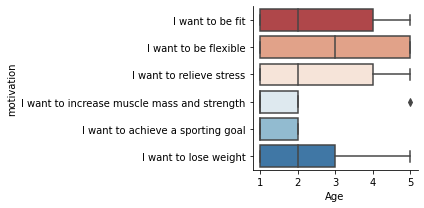

In [51]:
sns.catplot(x="Age", y= "motivation"  ,kind="box", orient="h", height=3, aspect=2,data=data, palette='RdBu')

## Conclusion - 3
According to the data, it can be concluded that the common motivation of most people of all ages is to be in fit and to be flexible. In addition it can be seen that between the ages of 15 and 30 they are more interested in losing weight and in addition at younger ages between 15 and 25. 
The  also want to increase their muscles and this is probably a characteristic of their environment and young ages.
In addition, it can be seen that at many ages people tend to exercise to relieve stress and the common line is found in group 2 of ages 19 to 25, who exercise the most for this reason and it can be concluded that they are in a stressful period in their lives.

## 4 -  Exercising with others 

Exercising with other people could be more fun, help you stick to your goal and keep you motivated for a longer period of time. 
We wanted to see if people that workout with others, exercise more throughout the the week. 


![download.gift](https://c.tenor.com/m6dtTqNp7c0AAAAC/the-simpsons-go-sports.gif)

In [52]:
data= data.replace({"Workout Enviorement" : { "With a group" : "With others", 'With a friend' : "With others" , "Within a class environment": "With others"}})
data['Workout Enviorement'].value_counts()

Alone                      113
With others                 68
I don't really exercise     28
Name: Workout Enviorement, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Workout Enviorement'>

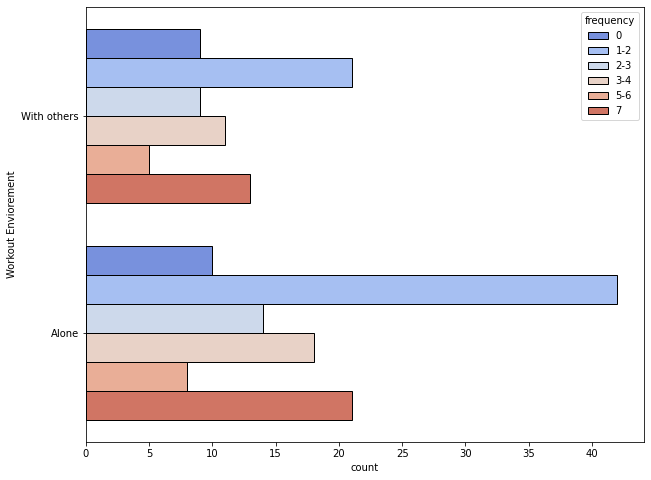

In [53]:
plt.figure(figsize=(10,8))
hue_order = ["0","1-2","2-3" ,"3-4","5-6","7"]

order = ["With others","Alone"]
sns.countplot(y='Workout Enviorement' , hue='frequency', hue_order = hue_order, data=data, edgecolor = 'black', palette="coolwarm", order = order)

## Conclusion - 4 :
We thought due to the benefits of exercising together ,people who workout 5-7 times a week, would train with others.
Here we seee that most people that workout as frequently actually exercise alone.

## Overall conclusions:
In light of the fact that the most common type of sport is walking, it can be concluded that people would prefer to go for a walk - early in the morning or in the evening because they do not want to walk during hot hours of the day or during work hours. In addition, walking is an independent type of sport that does not require a group, so it can be concluded that people train alone. And the reason why people don't have time to exercise can be related - that they don't have time to prepare healthy food for them.

<img src = 'https://webunwto.s3.eu-west-1.amazonaws.com/2020-01/sport-congresse.jpg'
width = "600">